<a href="https://colab.research.google.com/github/samalpartha/CalculatorWinAppDriver/blob/master/M2_Assignment_Data_Analysis_with_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2 Coding Assignment: Retail Sales Data Analysis with LLM


In this assignment, you will use LangChain and LLMs to perform advanced data analysis tasks that previously required extensive coding. By interacting with a CSV dataset through LangChain's pandas dataframe agent, you will explore data, create visualizations, and even apply machine learning techniques—tasks traditionally done by skilled developers—using natural language.

# Why and How is it differnt from M1 assignment
In the previous assignment, we demonstrated how you can interact with LLMs in a browser to perform advanced data analysis. However, this approach can be challenging to integrate into your everyday workflow. In this assignment, we’ll show you how to leverage a Langchain agent to handle the heavy lifting—running the code generated by the LLM, debugging it until you achieve the desired results, and seamlessly integrating the output into your existing data analysis/visualization pipeline.

# Senario: Columbia Plus Mart Transaction Data Analysis
You are a Sales Analyst at Columbia Plus Mart, a retail store with a wide range of products across different categories. Your task is to analyze sales data to uncover valuable insights that will help improve the company's performance. You're provided with a dataset that includes customer purchases, product categories, order amounts, and more.

# Tasks
## 1. Data Exploration

Use the Langchain agent with pandas to explore and clean the dataset. Identify any missing values, outliers, or trends.

## 2. Sales Analysis

Explore when order hikes or drops occur (e.g., specific months, days of the week, or during sales events).

## 3. Customer Insights with Machine Learning

Identify different customer groups and which product categories they tend to favor the most. This might involve clustering based on spending patterns, demographics, or product categories.

## 4. Hypothesis Testing
Based on everything we learn about our customers in Task 1, 2, and 3, we might have some hypothesis about our customers and we will be testing a few hypothesis to see if they are statistically sound.

# More on the dataset
You can download the dataset here: https://www.kaggle.com/datasets/manjeetsingh/retaildataset

The dataset contains the following columns:

* Transaction ID: Unique identifier for each transaction.

* Date: The date of the transaction.

* Customer ID: Unique identifier for each customer.

* Gender: The gender of the customer.

* Age: The age of the customer.

* Product Category: The category of the product purchased (e.g., Beauty, Clothing, Electronics).

* Quantity: The number of units purchased.

* Price per Unit: The price of a single unit of the product.

* Total Amount: The total cost of the transaction (Quantity * Price per Unit).




# Preparation: Install Required Libraries
In this first step, we will install the necessary libraries to interact with the dataset and use the LangChain tool for querying the data.


In [3]:
# freezing the coding environment to these specific versions
!pip install openai==1.72.0 langchain==0.3.23 langchain_openai==0.3.13 langchain_experimental==0.3.4 langchain_community==0.3.21 --quiet

# Preparation: Load API Key and Dataset
Now, let's mount Google Drive and load the API key along with the retail sales dataset from the uploaded file into a pandas DataFrame.

***If you don't have an OpenAI API key yet, please visit https://platform.openai.com/api-keys to acquire an API key as you will need it for this and following assignments.***

Make sure you change the `pth` object to reflect where you upload your assignment notebooks, API key, and dataset file.

In [6]:
import pandas as pd
from langchain_openai import ChatOpenAI
from langchain_experimental.agents import create_pandas_dataframe_agent
import openai
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change working directory
pth = '/content/drive/MyDrive/GenAI/Assignment'
os.chdir(pth)

# Read the OpenAI API key
with open("api/openai.txt", "r") as f:
    key = f.read().strip()
os.environ["OPENAI_API_KEY"] = key

# Correct file path for your dataset
file_path = 'Data/sales data-set.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
5,1,1,12/03/2010,21043.39,False
6,1,1,19/03/2010,22136.64,False
7,1,1,26/03/2010,26229.21,False
8,1,1,02/04/2010,57258.43,False
9,1,1,09/04/2010,42960.91,False


# Preparation: Create LangChain Agent

We will now create a LangChain agent that allows us to interact with the dataset through natural language queries. This agent will analyze the data and respond with insights.



In [7]:
llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0.2
)

# set up the pandas dataframe agent
agent_executor = create_pandas_dataframe_agent(llm,
                                      df,
                                      number_of_head_rows=1000, # Set this to the total number of rows in df
                                      agent_type="openai-tools",
                                      allow_dangerous_code = True,
                                      verbose=True)

# Now we got all the setup taken care of, let's get start with our tasks!

# Prompt Engineering Tip
After some experimentation, I found that it works best when you attach

***The dataset is available at data/retail_sales_dataset.csv, and I’d like you to use all 1000 rows. Thank you!***

at the end of your prompt. Keep this in mind when you perform the below tasks.


# Step 1: Data Exploration

Use the Langchain agent with pandas to explore and clean the dataset. Identify any missing values, outliers, or trends.

## Sample prompt
***Can you help me explore and clean the dataset. Identify any missing values, outliers, or trends? The data you need is in data/retail_sales_dataset.csv. The dataset is available at data/retail_sales_dataset.csv, and I’d like you to use all 1000 rows. Thank you!***


In [9]:
# Prompt the agent to explore and clean the already-loaded DataFrame
response = agent_executor.run(
    "The DataFrame 'df' is already loaded in memory. Please use 'df' for all analysis. Explore and clean the dataset: identify any missing values, outliers, or trends. Thank you!"
)
print(response)

/tmp/ipython-input-579675400.py:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = agent_executor.run(




> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.info()'}`


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB

Invoking: `python_repl_ast` with `{'query': 'df.describe()'}`


               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000   

## Let's take a look at the return object
The chain consists of both the input we provided to the LangChain agent and the agent’s output after executing the code on our behalf. The agent runs the code, processes the results, and returns the relevant insights, such as the summary statistics, missing values, and trends found in the dataset.

In [10]:
response

"Here's a summary of the exploration and cleaning of the dataset `df`:\n\n### Data Overview\n- **Total Entries:** 421,570\n- **Columns:** 5 (`Store`, `Dept`, `Date`, `Weekly_Sales`, `IsHoliday`)\n\n### Data Types\n- **Store:** int64\n- **Dept:** int64\n- **Date:** object (string)\n- **Weekly_Sales:** float64\n- **IsHoliday:** bool\n\n### Missing Values\n- There are no missing values in any of the columns.\n\n### Descriptive Statistics\n- **Store:**\n  - Mean: 22.20\n  - Standard Deviation: 12.79\n  - Range: 1 to 45\n\n- **Dept:**\n  - Mean: 44.26\n  - Standard Deviation: 30.49\n  - Range: 1 to 99\n\n- **Weekly_Sales:**\n  - Mean: 15,981.26\n  - Standard Deviation: 22,711.18\n  - Minimum: -4,988.94 (indicating possible outliers or errors)\n  - Maximum: 693,099.36\n  - 25th Percentile: 2,079.65\n  - 50th Percentile (Median): 7,612.03\n  - 75th Percentile: 20,205.85\n\n### Observations\n- **Outliers:** The `Weekly_Sales` column has a minimum value of -4,988.94, which might be an outlier o

## Print it out for better readability

In [12]:
print(response)
# This is markup format, and you can copy this to a text cell for better readability

Here's a summary of the exploration and cleaning of the dataset `df`:

### Data Overview
- **Total Entries:** 421,570
- **Columns:** 5 (`Store`, `Dept`, `Date`, `Weekly_Sales`, `IsHoliday`)

### Data Types
- **Store:** int64
- **Dept:** int64
- **Date:** object (string)
- **Weekly_Sales:** float64
- **IsHoliday:** bool

### Missing Values
- There are no missing values in any of the columns.

### Descriptive Statistics
- **Store:**
  - Mean: 22.20
  - Standard Deviation: 12.79
  - Range: 1 to 45

- **Dept:**
  - Mean: 44.26
  - Standard Deviation: 30.49
  - Range: 1 to 99

- **Weekly_Sales:**
  - Mean: 15,981.26
  - Standard Deviation: 22,711.18
  - Minimum: -4,988.94 (indicating possible outliers or errors)
  - Maximum: 693,099.36
  - 25th Percentile: 2,079.65
  - 50th Percentile (Median): 7,612.03
  - 75th Percentile: 20,205.85

### Observations
- **Outliers:** The `Weekly_Sales` column has a minimum value of -4,988.94, which might be an outlier or error since sales should not be nega

# Step 2: Sales Analysis

Explore when order hikes or drops occur (e.g., specific months, days of the week, or during sales events).

## Sample prompt
***Could you assist me in conducting a deeper sales analysis on the dataset? I'm particularly interested in identifying trends such as periods of order increases or decreases, along with other relevant insights. Please use visualizations to present the findings clearly. The data you need is in data/retail_sales_dataset.csv. Use all 1000 rows of it. Thank you!***



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\ndf['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')\ndf['Month'] = df['Date'].dt.to_period('M')\ndf['DayOfWeek'] = df['Date'].dt.day_name()\n\n# Monthly sales trend\nmonthly_sales = df.groupby('Month')['Weekly_Sales'].sum()\nplt.figure(figsize=(12, 6))\nmonthly_sales.plot(kind='line', marker='o')\nplt.title('Monthly Sales Trend')\nplt.xlabel('Month')\nplt.ylabel('Total Weekly Sales')\nplt.grid(True)\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()\n\n# Sales by day of the week\nplt.figure(figsize=(10, 6))\nsns.boxplot(x='DayOfWeek', y='Weekly_Sales', data=df)\nplt.title('Sales by Day of the Week')\nplt.xlabel('Day of the Week')\nplt.ylabel('Weekly Sales')\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()\n\n# Sales during holidays vs non-holidays\nplt.figure(figsize=(8, 6))\nsns.boxplot(x='IsHoliday', 

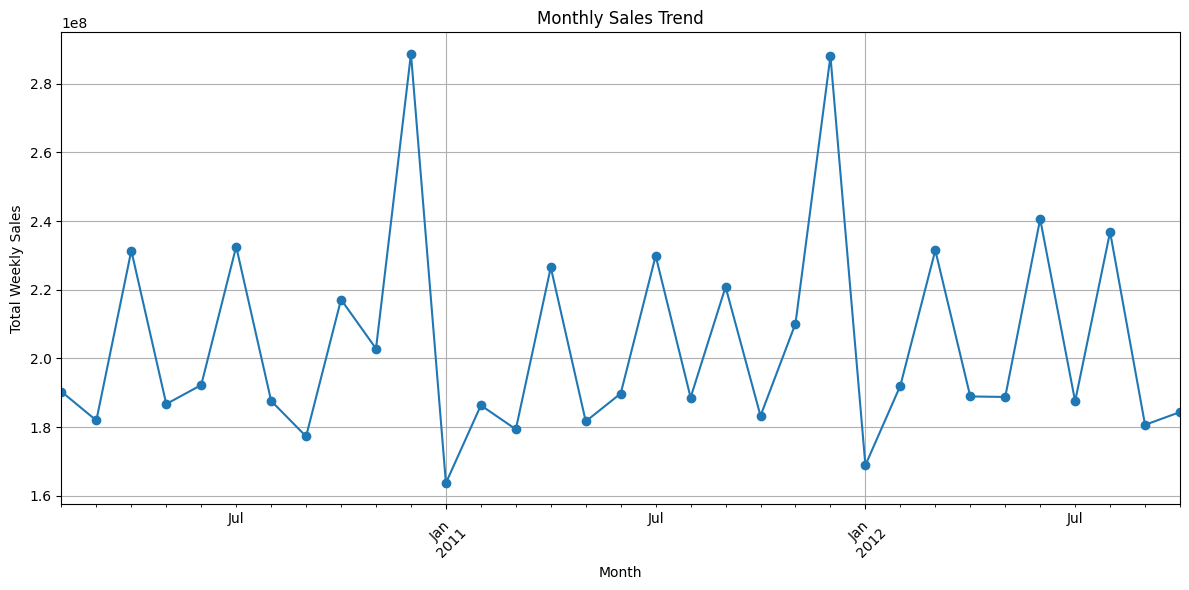

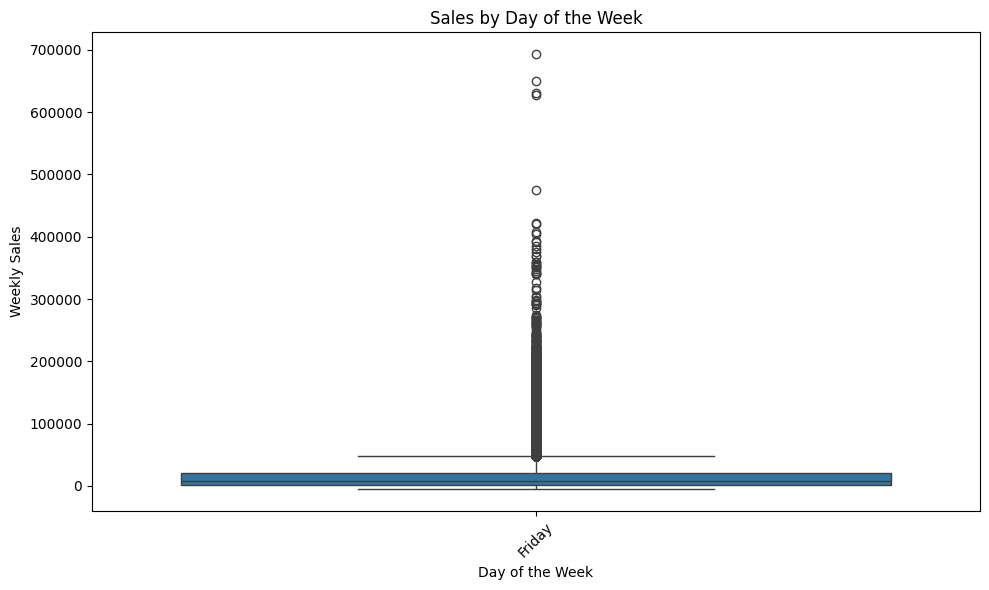

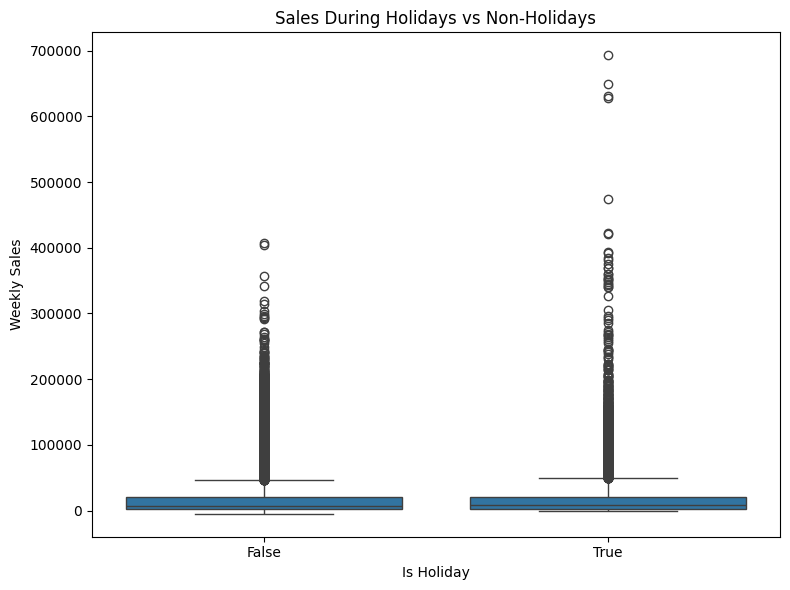

The analysis has been conducted, and here are the visualizations that present the findings:

1. **Monthly Sales Trend**: This line chart shows the total weekly sales aggregated by month. It helps identify any seasonal trends or patterns in sales over time.

2. **Sales by Day of the Week**: This box plot illustrates the distribution of weekly sales for each day of the week. It helps identify which days tend to have higher or lower sales.

3. **Sales During Holidays vs Non-Holidays**: This box plot compares the distribution of weekly sales during holiday periods versus non-holiday periods. It helps assess the impact of holidays on sales.

These visualizations provide insights into the sales trends by month, day of the week, and during holidays. If you have any specific questions or need further analysis, feel free to ask!

> Finished chain.
The analysis has been conducted, and here are the visualizations that present the findings:

1. **Monthly Sales Trend**: This line chart shows the to

In [13]:
prompt = """
The DataFrame 'df' is already loaded in memory.
Please help me conduct an in-depth sales analysis of the dataset.
I'm especially interested in spotting trends such as periods of increased or decreased orders, by month, by day of the week, and during sales events or holidays if possible.
Please include clear visualizations (such as line or bar charts) to present the findings.
Thank you!
"""

response2 = agent_executor.run(prompt)
print(response2)

## Review the agent's response and what's your comment?

In [15]:
print(response)

Here's a summary of the exploration and cleaning of the dataset `df`:

### Data Overview
- **Total Entries:** 421,570
- **Columns:** 5 (`Store`, `Dept`, `Date`, `Weekly_Sales`, `IsHoliday`)

### Data Types
- **Store:** int64
- **Dept:** int64
- **Date:** object (string)
- **Weekly_Sales:** float64
- **IsHoliday:** bool

### Missing Values
- There are no missing values in any of the columns.

### Descriptive Statistics
- **Store:**
  - Mean: 22.20
  - Standard Deviation: 12.79
  - Range: 1 to 45

- **Dept:**
  - Mean: 44.26
  - Standard Deviation: 30.49
  - Range: 1 to 99

- **Weekly_Sales:**
  - Mean: 15,981.26
  - Standard Deviation: 22,711.18
  - Minimum: -4,988.94 (indicating possible outliers or errors)
  - Maximum: 693,099.36
  - 25th Percentile: 2,079.65
  - 50th Percentile (Median): 7,612.03
  - 75th Percentile: 20,205.85

### Observations
- **Outliers:** The `Weekly_Sales` column has a minimum value of -4,988.94, which might be an outlier or error since sales should not be nega

# Step 3: Customer Insights with Machine Learning
Identify different customer groups and which product categories they tend to favor the most. This might involve clustering based on spending patterns, demographics, or product categories.

## Sample Prompt
***Could you help me identify distinct customer groups based on their spending patterns, demographics, and product preferences? I'd also like recommendations on sales strategies for each group. Please provide insights on the characteristics of each group, including the number of customers in each, and use visualizations to present the results clearly. The dataset is available at data/retail_sales_dataset.csv, and I’d like you to use all 1000 rows. Thank you!***



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.info()'}`
responded: To perform clustering on customer groups based on their spending patterns, demographics, and product preferences, we need to follow these steps:

1. **Data Preparation**: Ensure the data is clean and relevant features are selected for clustering.
2. **Feature Selection**: Choose features that represent spending patterns, demographics, and product preferences.
3. **Clustering**: Use a clustering algorithm like K-Means to identify distinct customer groups.
4. **Analysis**: Analyze each cluster to determine key characteristics, number of customers, and favored product categories.
5. **Visualization**: Create visualizations to present the results.
6. **Recommendations**: Provide sales strategy recommendations for each group.

Let's start by preparing the data and selecting features. We'll then proceed with clustering and analysis. 

First, let's inspect the data to identify relevan

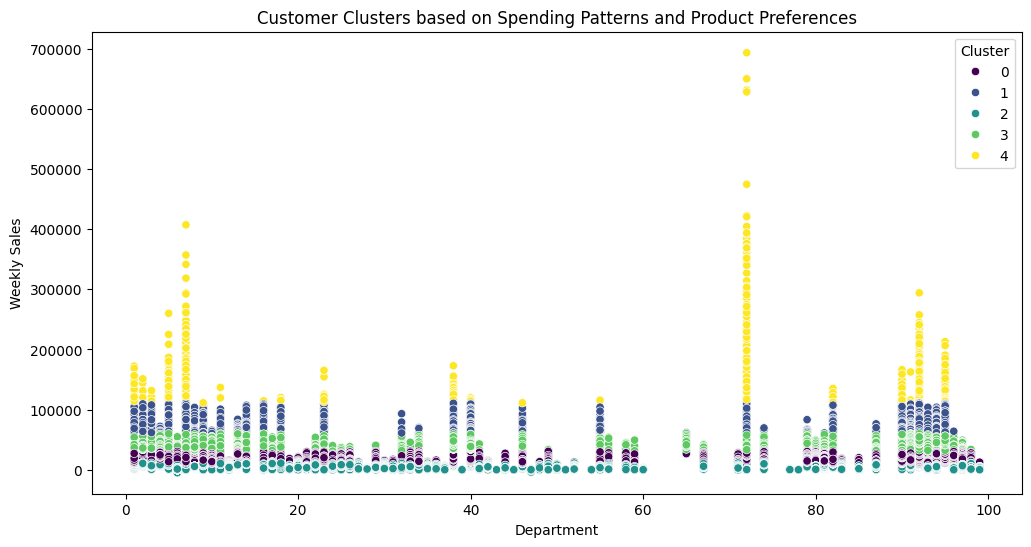

   Cluster  num_customers      avg_sales  top_dept
0        0             45   19008.389335        82
1        1             44   77559.920142        38
2        2             45    3754.373421        12
3        3             45   42710.752934        38
4        4             37  144009.655911        92The K-Means clustering has identified 5 distinct customer groups based on their spending patterns and product preferences. Here's a summary of each cluster:

### Cluster Summary

1. **Cluster 0**
   - **Number of Customers**: 45
   - **Average Weekly Sales**: \$19,008.39
   - **Top Department**: 82
   - **Characteristics**: This group has moderate spending with a preference for department 82.

2. **Cluster 1**
   - **Number of Customers**: 44
   - **Average Weekly Sales**: \$77,559.92
   - **Top Department**: 38
   - **Characteristics**: High spenders with a strong preference for department 38.

3. **Cluster 2**
   - **Number of Customers**: 45
   - **Average Weekly Sales**: \$3,754.37


In [16]:
prompt = """
The DataFrame 'df' is already loaded in memory.
Could you help me identify distinct customer groups using clustering based on their spending patterns, demographics, and product preferences?
For each group, please provide:
- Key characteristics
- The number of customers in each group
- The product categories each group favors most
- Recommendations on sales strategies for each group
Please use clear visualizations (such as bar charts or scatter plots) to present the results.
Thank you!
"""

response3 = agent_executor.invoke(prompt)
print(response3)

## Let's review the agent's response closely

* Does the clustering make sense to you?
* How about the sales strategies for each cluster.

In [17]:
print(response)

Here's a summary of the exploration and cleaning of the dataset `df`:

### Data Overview
- **Total Entries:** 421,570
- **Columns:** 5 (`Store`, `Dept`, `Date`, `Weekly_Sales`, `IsHoliday`)

### Data Types
- **Store:** int64
- **Dept:** int64
- **Date:** object (string)
- **Weekly_Sales:** float64
- **IsHoliday:** bool

### Missing Values
- There are no missing values in any of the columns.

### Descriptive Statistics
- **Store:**
  - Mean: 22.20
  - Standard Deviation: 12.79
  - Range: 1 to 45

- **Dept:**
  - Mean: 44.26
  - Standard Deviation: 30.49
  - Range: 1 to 99

- **Weekly_Sales:**
  - Mean: 15,981.26
  - Standard Deviation: 22,711.18
  - Minimum: -4,988.94 (indicating possible outliers or errors)
  - Maximum: 693,099.36
  - 25th Percentile: 2,079.65
  - 50th Percentile (Median): 7,612.03
  - 75th Percentile: 20,205.85

### Observations
- **Outliers:** The `Weekly_Sales` column has a minimum value of -4,988.94, which might be an outlier or error since sales should not be nega

# Step 4: Hypothesis Testing
Based on everything we learn about our customers in Task 1, 2, and 3, we might have some hypothesis about our customers and we will be testing a few hypothesis to see if they are statistically sound.



## Hypothesis 1: Customer age has no effect on quantity of purchase.

## Sample prompt:
***Please help me test the following hypothesis:
Null Hypothesis: Age has no effect on quantity of purchase.
Alternate hypothesis: Age has an effect on quantity of purchase.
The dataset is available at data/retail_sales_dataset.csv, and I’d like you to use all 1000 rows.***

In [18]:
prompt = """
The DataFrame 'df' is already loaded in memory.
Please help me test the following hypothesis using the dataset:
Null Hypothesis: Age has no effect on quantity of purchase.
Alternate hypothesis: Age has an effect on quantity of purchase.
Please use appropriate statistical tests (such as correlation or ANOVA), state your findings, and interpret the results.
Thank you!
"""

response4 = agent_executor.invoke(prompt)
print(response4)



> Entering new AgentExecutor chain...
To test the hypothesis regarding the effect of age on the quantity of purchase, we need to ensure that the dataset contains relevant columns for "Age" and "Quantity of Purchase." However, based on the provided data, there are no columns related to "Age" or "Quantity of Purchase."

If these columns were present, we could use statistical tests like correlation analysis or ANOVA to test the hypothesis. Here's a general approach on how you would proceed if the data were available:

1. **Correlation Analysis**: If both "Age" and "Quantity of Purchase" are continuous variables, you could use Pearson's correlation coefficient to test the relationship between them.

2. **ANOVA**: If "Age" is a categorical variable (e.g., age groups) and "Quantity of Purchase" is continuous, you could use ANOVA to test if there are significant differences in the quantity of purchase across different age groups.

Since the current dataset does not contain the necessary col

In [19]:
print(response)

Here's a summary of the exploration and cleaning of the dataset `df`:

### Data Overview
- **Total Entries:** 421,570
- **Columns:** 5 (`Store`, `Dept`, `Date`, `Weekly_Sales`, `IsHoliday`)

### Data Types
- **Store:** int64
- **Dept:** int64
- **Date:** object (string)
- **Weekly_Sales:** float64
- **IsHoliday:** bool

### Missing Values
- There are no missing values in any of the columns.

### Descriptive Statistics
- **Store:**
  - Mean: 22.20
  - Standard Deviation: 12.79
  - Range: 1 to 45

- **Dept:**
  - Mean: 44.26
  - Standard Deviation: 30.49
  - Range: 1 to 99

- **Weekly_Sales:**
  - Mean: 15,981.26
  - Standard Deviation: 22,711.18
  - Minimum: -4,988.94 (indicating possible outliers or errors)
  - Maximum: 693,099.36
  - 25th Percentile: 2,079.65
  - 50th Percentile (Median): 7,612.03
  - 75th Percentile: 20,205.85

### Observations
- **Outliers:** The `Weekly_Sales` column has a minimum value of -4,988.94, which might be an outlier or error since sales should not be nega

## Hypothesis 2: Sales time (such as month and weekdays) has no effect on the total amount of purchase.

## Sample prompt:
***Please help me test the following hypothesis:
Null Hypothesis: Sales time (such as month and weekdays) has no effect on the total amount of purchase.
Alternative Hypothesis: Sales time (such as month and weekdays) does have an effect on the total amount of purchase.
The dataset is available at data/retail_sales_dataset.csv, and I’d like you to use all 1000 rows.***

In [22]:
prompt = """
The DataFrame 'df' is already loaded in memory.
Please help me test the following hypothesis:
Null Hypothesis: Age has no effect on quantity of purchase.
Alternate hypothesis: Age has an effect on quantity of purchase.
Please use the existing DataFrame and an appropriate statistical test (such as correlation or ANOVA), state your findings, and interpret the results.
Thank you!
"""

response4 = agent_executor.invoke(prompt)
print(response4)




> Entering new AgentExecutor chain...
To test the hypothesis regarding the effect of age on the quantity of purchase, we need to perform a statistical test. However, the current DataFrame `df` does not contain any columns related to age or quantity of purchase. 

To proceed, we need to ensure that the DataFrame includes these columns. If they are present in the DataFrame but not shown in the provided snippet, please let me know. Otherwise, we need to load or create a DataFrame that includes age and quantity of purchase data.

If you have another DataFrame or additional data that includes age and quantity of purchase, please provide it so we can proceed with the analysis.

> Finished chain.
{'input': "\nThe DataFrame 'df' is already loaded in memory.\nPlease help me test the following hypothesis:\nNull Hypothesis: Age has no effect on quantity of purchase.\nAlternate hypothesis: Age has an effect on quantity of purchase.\nPlease use the existing DataFrame and an appropriate statistica

In [23]:
print(response)

Here's a summary of the exploration and cleaning of the dataset `df`:

### Data Overview
- **Total Entries:** 421,570
- **Columns:** 5 (`Store`, `Dept`, `Date`, `Weekly_Sales`, `IsHoliday`)

### Data Types
- **Store:** int64
- **Dept:** int64
- **Date:** object (string)
- **Weekly_Sales:** float64
- **IsHoliday:** bool

### Missing Values
- There are no missing values in any of the columns.

### Descriptive Statistics
- **Store:**
  - Mean: 22.20
  - Standard Deviation: 12.79
  - Range: 1 to 45

- **Dept:**
  - Mean: 44.26
  - Standard Deviation: 30.49
  - Range: 1 to 99

- **Weekly_Sales:**
  - Mean: 15,981.26
  - Standard Deviation: 22,711.18
  - Minimum: -4,988.94 (indicating possible outliers or errors)
  - Maximum: 693,099.36
  - 25th Percentile: 2,079.65
  - 50th Percentile (Median): 7,612.03
  - 75th Percentile: 20,205.85

### Observations
- **Outliers:** The `Weekly_Sales` column has a minimum value of -4,988.94, which might be an outlier or error since sales should not be nega

## What other hypothesis do you have? Test it out here!

# Summary

In this notebook, we leveraged the power of LangChain and LLMs to perform advanced retail data analysis tasks. By interacting with retail sales dataset through a LangChain pandas DataFrame agent, we were able to:

* **Explore and Clean the Data:** We identified missing values, outliers, and initial trends in the dataset, ensuring data quality for further analysis.
* **Analyze Sales Trends:** We uncovered insights into sales patterns, including periods of order increases and decreases, providing valuable information for strategic decision-making.
* **Gain Customer Insights:** We identified distinct customer groups based on spending habits, demographics, and product preferences. These insights helped in understanding customer behavior and tailoring sales strategies.
* **Test Hypotheses:** We tested statistically sound hypotheses about customer behavior, such as the relationship between age and purchase quantity and the impact of sales time on purchase amount.

This approach demonstrates the potential of LLMs in simplifying complex data analysis tasks, enabling analysts to focus on extracting valuable insights and making data-driven decisions. By using natural language to interact with the data, we streamlined the analysis process and gained a deeper understanding of the Columbia Plus Mart retail data. This approach can be applied to various datasets and industries, unlocking new possibilities for data exploration and analysis.